![Linux Academy](la-logo.png)
<hr/>

<center><h1>Introduction to Jupyter Notebooks</h1></center>
<center><h2>Using AWS SageMaker</h2></center>

# Introduction

In this Linux Academy hands-on lab we take an introductory look at __Jupyter Notebooks__ from within AWS SageMaker.

Jupyter Notebooks are designed to provide an easy way to interact with data and documentation at the same time.  Data scientists often use these books while designing and sharing solutions.

__Think of Jupyter Notebooks as a Wiki for code and data!__

# Scenario

Most of this Linux Academy hands-on lab is designed to familiarize you with the basic components of Jupyter Notebooks. We cover some basic libraries, commands, and their uses. We also have a data scenario to play with:

![I'm not heavy, I have dense feathers!](./animal-animal-photography-cold-86405.jpg)

A group of scientists have traveled to Antartica to carry out a penguin survey. During the survey, they collect the heights and weights of a number of penguins. The project wants us to use this data to create a (simple) machine learning algorithm to help predict the weights of penguin given their heights. This is not as simple as you might think! Penguins of the same height may weigh different amounts because of factors like diet, bone density, and feather density. So we need to analyze all the data and create a model that fits as best we can.

_(Clearly this is a fictitious dataset, please don't start a zoological penguin analysis business off of it!)_

We are going to use a linear regression algorithm, trained with our survey data. But first, let's get introduced to Jupyter Notebooks.

# How to Use This Lab

This is a follow-along lab. That is to say, the code in this Jupyter Notebook should be complete, and you could simply execute the notebook to get a result. However, watch the video to learn more about what is happening in the code and then take the time to experiment with the code; make changes, break it, fix it, and learn!


## 1) Markdown

This is a _Markdown_ cell.

Let's upload and display an image. When an image is uploaded we can add the following code to insert it into the document:

```![Pinehead](pinehead.jpg)```

1. Add a cell below this one.
2. Set it as a Markdown cell.
3. Copy the code snippet above into the cell.

## 2) Command-Line Operations

What happens when we run this cell?

In [1]:
!whoami
!which python

ec2-user
/home/ec2-user/anaconda3/envs/python3/bin/python


## 3) Python Operations

Notebooks are run within a kernel. These are like virtual environments that contain the running code and data. You can see the kernel being used for this notebook in the top right. We can even change it.

This notebook is running with a Python kernel. Python is a common language for Jupyter Notebooks but you can use others. Other kernels include different verions of Python and key libraries for the processing of data.

In [2]:
words = ['awesome', 'amazing', 'great']
for w in words:
    print('This Linux Academy lab is %s!' % w)

This Linux Academy lab is awesome!
This Linux Academy lab is amazing!
This Linux Academy lab is great!


## 4) Python Lists

In [3]:
myList = [0, 1, 2, 3, 4, 5]
myList

[0, 1, 2, 3, 4, 5]

In [4]:
myList.append('blue')
myList

[0, 1, 2, 3, 4, 5, 'blue']

In [5]:
myList[3]

3

In [6]:
myList[3:]

[3, 4, 5, 'blue']

In [7]:
len(myList)

7

## 5) NumPy

NumPy is the fundamental package for scientific computing with Python. Some of the elements it contains are:

- a powerful N-dimensional array object.
- sophisticated (broadcasting) functions.
- tools for integrating C/C++ and Fortran code.
- useful linear algebra, Fourier transform, and random number capabilities.

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data types can be defined. This enables NumPy to seamlessly and speedily integrate with a wide variety of databases.

_(Source: https://www.numpy.org/)_

In [8]:
import numpy as np

In [9]:
np.pi

3.141592653589793

To calculate the circumference of a circle from the radius we use the following equation:

\begin{align}
c & = 2\pi r \\
\end{align}

In [10]:
radius = 10
circumference = 2 * np.pi * radius
circumference

62.83185307179586

In [11]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4],
                ['Row3',5,6]])

print(data)

[['' 'Col1' 'Col2']
 ['Row1' '1' '2']
 ['Row2' '3' '4']
 ['Row3' '5' '6']]


In [12]:
print(data[1:,1:])

[['1' '2']
 ['3' '4']
 ['5' '6']]


## 6) pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures, and data analysis tools for the Python programming language.

_(Source: https://pandas.pydata.org/)_

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

df

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


### Sample Data
Let's load some sample data from a CSV.

In [15]:
penguin_data = pd.read_csv("penguin-data.csv")

penguin_data.shape

(20, 2)

In [16]:
penguin_data.head()

,Height,Weight
0,11,15
1,11,15
2,11,20
3,12,17
4,13,18


## 7) Matplotlib

Matplotlib is a Python, 2D-plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter Notebook, web application servers, and four graphical user interface toolkits.

_(Source: https://matplotlib.org/)_

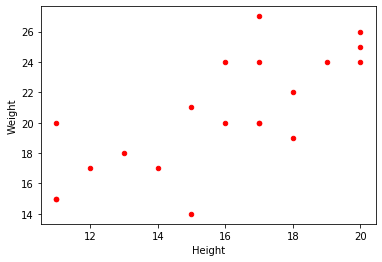

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

penguin_data.plot(kind='scatter',x='Height',y='Weight',color='red')


## 8) scikit-learn

Machine learning in Python.

- Simple and efficient tools for data mining and data analysis.
- Accessible to everybody and reusable in various contexts.
- Built on NumPy, SciPy, and matplotlib.
- Open source, commercially-usable BSD license.

_(Source: https://scikit-learn.org/)_

### Train a Linear Regression Model

Train a very simple model:

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set up the Linear Regression model
model = LinearRegression()

# Train the model with our data
model.fit(penguin_data[['Height']], penguin_data['Weight'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Show the very simple model mapped to the training data:

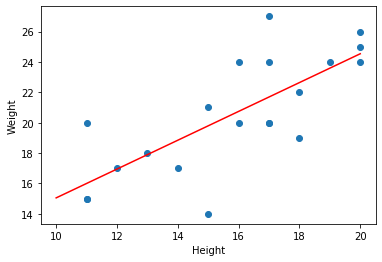

In [19]:
# Plot our original training data
axes = plt.axes()
axes.scatter(x=penguin_data['Height'], y=penguin_data['Weight'])

# Determine the best fit line
slope = model.coef_[0]
intercept = model.intercept_

# Plot our model line
x = np.linspace(10,20)
y = slope*x+intercept
axes.plot(x, y, 'r')

# Add some labels to the graph
axes.set_xlabel('Height')
axes.set_ylabel('Weight')

plt.show()

### Make a Prediction

The science team has spotted a new penguin and measured its height.

Enter the height into the code here, then run the code to predict the weight of the penguin.

In [20]:
height = 14

# Reshape the hight into an array
new_height = np.reshape([height],(1, -1))

# Pass the new height to the model so that a predicted weight can be infered
weight = model.predict(new_height)[0]

# Print the information back to the user
print ( "If you see a penguin thats %.2f tall, you can expect it to be %.2f in weight." % (height, weight))

If you see a penguin thats 14.00 tall, you can expect it to be 18.84 in weight.


That is the end of this Linux Academy hands-on lab. Thanks!